In [1]:
# philip walsh
# philipwalsh.ds@gmail.com
# 2020-02-17
# predict_record_count.ipynb

In [2]:
# background
#  i have a process that feeds me data
#  the data is supposed to arrive daily
#  the users are happiest when the data arrives early in the day
#  the data being sent relates to the previous days activities
#
#  the process that sends me the data is a black box
#   out of my hands
#   the more activity in general, the longer it takes for the 
#   data to arrive because the black box is responsible
#   for many different activities and it is low on compute resources
#
#  i created my own process that tracks the arrival time and record count
#   [arrived_date]   : the date + time the notification email was queued up
#   [arrived_hour]   : the hour of the day it arrived
#   [arrived_minute] : the minute of the day it arrived
#   [record_count]   : the number of reecords received
#

In [3]:
# the goal
# predict the record count

# The data is from a single calendar year, so holiday trends will be impossible to predict
# I am more curious about predicting non holiday, normal trends.
# so the dataset has been stripped of a few holiday weeks
#  first week in july and 2 weeks in december
# Also, there are exactly 48 full weeks in the data.  nore more no less.
#  a week is defined as day 1=Sunday, Day 7=Saturday


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
import tensorflow as tf
print ('tensorflow version  :', tf.__version__)

tensorflow version  : 2.0.0


In [6]:
try:
    del data
except:
    print('saul goodman')
    
data = pd.read_csv('./data/2018.csv')

saul goodman


In [7]:
data.head(14)

,arrived_date,arrived_hour,arrived_minute,record_count
0,2018-01-07 08:30:06.953,8,30,2
1,2018-01-08 09:30:11.170,9,30,40
2,2018-01-09 09:00:12.733,9,0,318
3,2018-01-10 10:00:10.730,10,0,436
4,2018-01-11 11:30:09.677,11,30,308
5,2018-01-12 12:00:07.217,12,0,354
6,2018-01-13 08:00:06.813,8,0,253
7,2018-01-14 08:00:05.267,8,0,8
8,2018-01-15 13:14:02.110,13,14,28
9,2018-01-16 10:00:10.437,10,0,511


In [8]:
data.tail(14)

,arrived_date,arrived_hour,arrived_minute,record_count
322,2018-12-02 12:00:04.030,12,0,9
323,2018-12-03 17:30:08.500,17,30,12
324,2018-12-04 13:30:09.420,13,30,290
325,2018-12-05 13:30:05.730,13,30,298
326,2018-12-06 12:00:16.817,12,0,313
327,2018-12-07 12:00:12.307,12,0,366
328,2018-12-08 09:00:01.903,9,0,251
329,2018-12-09 09:30:02.170,9,30,3
330,2018-12-10 14:30:07.897,14,30,47
331,2018-12-11 15:00:09.540,15,0,390


In [9]:
len(data)

336

In [10]:
# how many instances of the week cycle do i have?
len(data)/7

48.0

In [11]:
# no remaninder, no extra days?
len(data) % 7

0

length of   : 7
0    2018-01-07 08:30:06.953
1    2018-01-08 09:30:11.170
2    2018-01-09 09:00:12.733
3    2018-01-10 10:00:10.730
4    2018-01-11 11:30:09.677
5    2018-01-12 12:00:07.217
6    2018-01-13 08:00:06.813
Name: arrived_date, dtype: object
0      2
1     40
2    318
3    436
4    308
5    354
6    253
Name: record_count, dtype: int64


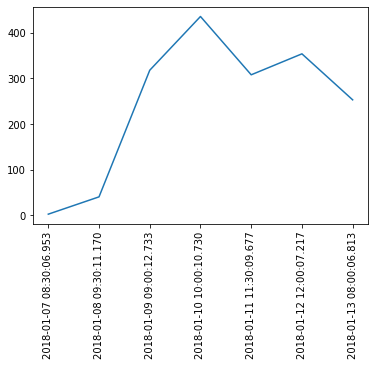

In [67]:
# lets have a look at week 1
start_index=0
end_index=7
print('length of   :', len(data['arrived_date'][start_index:end_index]))
print(data['arrived_date'][start_index:end_index])
print(data['record_count'][start_index:end_index])
plt.xticks(rotation=90)
plt.plot(data['arrived_date'][start_index:end_index], data['record_count'][start_index:end_index])

length of   : 7
7     2018-01-14 08:00:05.267
8     2018-01-15 13:14:02.110
9     2018-01-16 10:00:10.437
10    2018-01-17 10:00:06.633
11    2018-01-18 11:30:14.490
12    2018-01-19 11:30:15.283
13    2018-01-20 09:00:00.937
Name: arrived_date, dtype: object
7       8
8      28
9     511
10    341
11    303
12    330
13    274
Name: record_count, dtype: int64


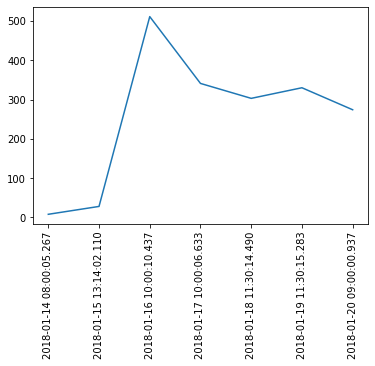

In [68]:
# lets have a look at week 2
start_index=7
end_index=14
print('length of   :', len(data['arrived_date'][start_index:end_index]))
print(data['arrived_date'][start_index:end_index])
print(data['record_count'][start_index:end_index])
plt.xticks(rotation=90)
plt.plot(data['arrived_date'][start_index:end_index], data['record_count'][start_index:end_index])

length of   : 7
14    2018-01-21 10:30:12.590
15    2018-01-22 13:00:06.353
16    2018-01-23 12:00:08.023
17    2018-01-24 12:00:10.787
18    2018-01-25 12:30:09.373
19    2018-01-26 13:30:07.757
20    2018-01-27 09:00:07.453
Name: arrived_date, dtype: object
14      6
15     38
16    362
17    362
18    393
19    374
20    309
Name: record_count, dtype: int64


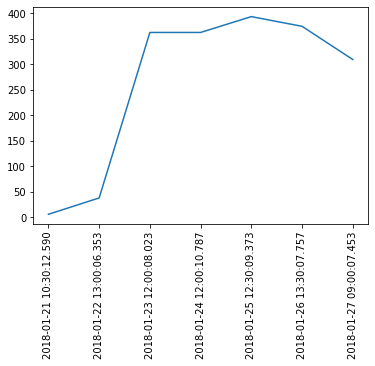

In [69]:
# lets have a look at week 3
start_index=14
end_index=21
print('length of   :', len(data['arrived_date'][start_index:end_index]))
print(data['arrived_date'][start_index:end_index])
print(data['record_count'][start_index:end_index])
plt.xticks(rotation=90)
plt.plot(data['arrived_date'][start_index:end_index], data['record_count'][start_index:end_index])

length of   : 21
0     2018-01-07 08:30:06.953
1     2018-01-08 09:30:11.170
2     2018-01-09 09:00:12.733
3     2018-01-10 10:00:10.730
4     2018-01-11 11:30:09.677
5     2018-01-12 12:00:07.217
6     2018-01-13 08:00:06.813
7     2018-01-14 08:00:05.267
8     2018-01-15 13:14:02.110
9     2018-01-16 10:00:10.437
10    2018-01-17 10:00:06.633
11    2018-01-18 11:30:14.490
12    2018-01-19 11:30:15.283
13    2018-01-20 09:00:00.937
14    2018-01-21 10:30:12.590
15    2018-01-22 13:00:06.353
16    2018-01-23 12:00:08.023
17    2018-01-24 12:00:10.787
18    2018-01-25 12:30:09.373
19    2018-01-26 13:30:07.757
20    2018-01-27 09:00:07.453
Name: arrived_date, dtype: object
0       2
1      40
2     318
3     436
4     308
5     354
6     253
7       8
8      28
9     511
10    341
11    303
12    330
13    274
14      6
15     38
16    362
17    362
18    393
19    374
20    309
Name: record_count, dtype: int64


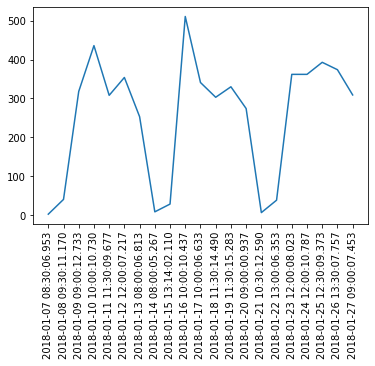

In [70]:
# lets have a look at week 1-3
start_index=0
end_index=21
print('length of   :', len(data['arrived_date'][start_index:end_index]))
print(data['arrived_date'][start_index:end_index])
print(data['record_count'][start_index:end_index])
plt.xticks(rotation=90)
plt.plot(data['arrived_date'][start_index:end_index], data['record_count'][start_index:end_index])

In [16]:
# we need a test set, something from the end of the time series data
# we take a percentage of the end of the ts data
# as the test
test_percent = 0.1
test_record_count = int(len(data)/7 * test_percent) * 7
test_record_count

28

In [17]:
test_ind = int(len(data)-test_record_count)
test_ind

308

In [18]:
print('length of training :' , len(data[:test_ind]))
print('length of test     : ', len(data[test_ind:]))
print('weeks in training  :' , len(data[:test_ind])/7)
print('weeks in test      : ', len(data[test_ind:])/7)

length of training : 308
length of test     :  28
weeks in training  : 44.0
weeks in test      :  4.0


In [19]:
# from beginning, up to but not including the test_ind
train = pd.DataFrame(data.iloc[:test_ind]['record_count'])  

In [20]:
# from the test_ind to the end
test = pd.DataFrame(data.iloc[test_ind:]['record_count'])

In [21]:
print('train len    :', len(train))
print('train len/7  :', len(train)/7)
print('train len%7  :', len(train)%7)


print('test len     :', len(test))
print('test len/7  :', len(test)/7)
print('test len%7  :', len(test)%7)


train len    : 308
train len/7  : 44.0
train len%7  : 0
test len     : 28
test len/7  : 4.0
test len%7  : 0


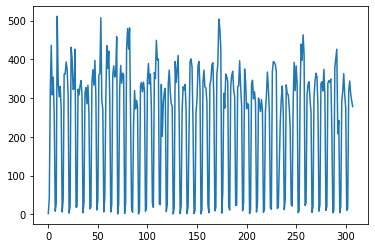

In [22]:
plt.plot(train);

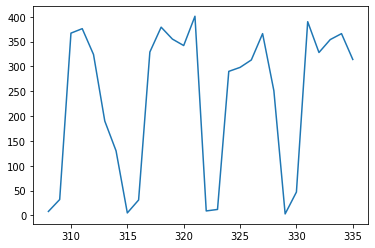

In [23]:
plt.plot(test);

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
type(train)

pandas.core.frame.DataFrame

In [28]:
scaler.fit(train) #fit only on the training data

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
# apply the scaler to the train 
scaled_train = scaler.transform(train) 

In [30]:
# AND tot he test
scaled_test = scaler.transform(test)

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [32]:
# help(TimeseriesGenerator)

In [33]:
# output length
length = 10
# number of time series to return
batch_size = 1

try:
    del generator
    print('gen cleaned up')
except:
    print('no gen yet, saul goodman')
    

generator = TimeseriesGenerator(scaled_train, 
                                scaled_train,
                               length=length,
                                batch_size=batch_size)
print('gen created')

no gen yet, saul goodman
gen created


In [34]:
len(scaled_train) #315

308

In [35]:
len(generator) #its 10 less than scaled_train

298

In [36]:
(X,y)=generator[2]

In [37]:
X

array([[[0.62156863],
        [0.85294118],
        [0.60196078],
        [0.69215686],
        [0.49411765],
        [0.01372549],
        [0.05294118],
        [1.        ],
        [0.66666667],
        [0.59215686]]])

In [38]:
length

10

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [40]:
n_features = 1

In [41]:
try:
    del model
    print('model deleted')
except:
    print('no mdel defined, saul goodman')


model = Sequential()
model.add(SimpleRNN(units=7,input_shape=(length, n_features) ))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print('model created')
model.summary()

no mdel defined, saul goodman
model created
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 7)                 63        
_________________________________________________________________
dense (Dense)                (None, 1)                 8         
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [44]:
my_epochs = 15

if True:
    with tf.device('/CPU:0'):
        # CPU
        #
        model.fit_generator(generator, epochs=my_epochs) 
if False:
    with tf.device('/GPU:0'): 
        # RTX 2080
        model.fit_generator(generator, epochs=my_epochs)
if False:
    with tf.device('/GPU:1'): 
        # GTX 970
        model.fit_generator(generator, epochs=my_epochs)
    
    


Epoch 1/15
298/298 [==============================] - 16s 55ms/step - loss: 0.0899
Epoch 2/15
298/298 [==============================] - 16s 53ms/step - loss: 0.0611
Epoch 3/15
298/298 [==============================] - 16s 54ms/step - loss: 0.0357
Epoch 4/15
298/298 [==============================] - 16s 55ms/step - loss: 0.0227 
Epoch 5/15
298/298 [==============================] - 16s 53ms/step - loss: 0.0187
Epoch 6/15
298/298 [==============================] - 16s 54ms/step - loss: 0.0169
Epoch 7/15
298/298 [==============================] - 16s 54ms/step - loss: 0.0155
Epoch 8/15
298/298 [==============================] - 16s 55ms/step - loss: 0.0146
Epoch 9/15
298/298 [==============================] - 16s 54ms/step - loss: 0.0134
Epoch 10/15
298/298 [==============================] - 16s 53ms/step - loss: 0.0129
Epoch 11/15
298/298 [==============================] - 16s 53ms/step - loss: 0.0124
Epoch 12/15
298/298 [==============================] - 16s 53ms/step - loss: 0.0117


In [45]:
model.history.history

{'loss': [0.08990446587170897,
  0.061149637084853437,
  0.0357121492273026,
  0.022734467181845235,
  0.01866089761749007,
  0.01690855452263316,
  0.015517413010105015,
  0.01459143036855183,
  0.013428122561954057,
  0.012900061837546594,
  0.012363599211242672,
  0.011685572494448297,
  0.011364237684537088,
  0.01130418794154369,
  0.010879498988564704]}

In [46]:
losses = pd.DataFrame(model.history.history)

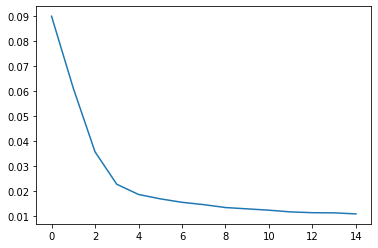

In [47]:
plt.plot(losses)

In [48]:
# take the last bits of data from trian
# predict the next number
# compare that number to our hold out test set

first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.70980392],
       [0.60196078],
       [0.53529412],
       [0.01764706],
       [0.02745098],
       [0.61960784],
       [0.67254902],
       [0.60784314],
       [0.57254902],
       [0.54313725]])

In [49]:
first_eval_batch_reshaped = first_eval_batch.reshape(1,length,n_features)

In [50]:
first_eval_batch_reshaped.shape

(1, 10, 1)

In [51]:
first_eval_batch_reshaped

array([[[0.70980392],
        [0.60196078],
        [0.53529412],
        [0.01764706],
        [0.02745098],
        [0.61960784],
        [0.67254902],
        [0.60784314],
        [0.57254902],
        [0.54313725]]])

In [52]:
model.predict(first_eval_batch_reshaped)

array([[0.12398315]], dtype=float32)

In [53]:
scaled_test[0]

array([0.01372549])

In [54]:
# so we need this in a loop to see forecasted numbers
test_preds =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)


In [55]:
# we need to append a value to tback end of the batchcurrent_batch
# and drop the first element
# so we have an array ( , , ,)
# we are appending to the middle dimension
# and dropping one
# np.append(:,1:,:, [[[new_value]]], axis=1) does the trick


#current_batch

In [56]:
#pred_value=[[[99]]]
#np.append(current_batch[:,1:,:], pred_value , axis=1)

In [57]:
# so we need this in a loop to see forecasted numbers
test_preds =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_preds.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]] , axis=1)
    # the indexing above says, grab all of the first index
    # start at 1 on the second and go to the end
    # take all of the third
    # that does a shift of the array basically dropping thefirst element
    # and then we are appending the precition to the end.
    # the more times through the loop, the more real points we loose
    # and the more predicted points get takced on
    
    

In [58]:
len(test_preds)

28

In [59]:
test_preds

[array([0.12398315], dtype=float32),
 array([0.06572673], dtype=float32),
 array([0.6611947], dtype=float32),
 array([0.71680796], dtype=float32),
 array([0.671226], dtype=float32),
 array([0.6935125], dtype=float32),
 array([0.6405717], dtype=float32),
 array([0.21441305], dtype=float32),
 array([0.13537176], dtype=float32),
 array([0.6489822], dtype=float32),
 array([0.73109186], dtype=float32),
 array([0.70064497], dtype=float32),
 array([0.76495695], dtype=float32),
 array([0.7319483], dtype=float32),
 array([0.31526318], dtype=float32),
 array([0.17020936], dtype=float32),
 array([0.61034226], dtype=float32),
 array([0.72924733], dtype=float32),
 array([0.7015868], dtype=float32),
 array([0.78677016], dtype=float32),
 array([0.79205054], dtype=float32),
 array([0.4389123], dtype=float32),
 array([0.19917966], dtype=float32),
 array([0.5523676], dtype=float32),
 array([0.7219764], dtype=float32),
 array([0.69946337], dtype=float32),
 array([0.7757515], dtype=float32),
 array([0.820

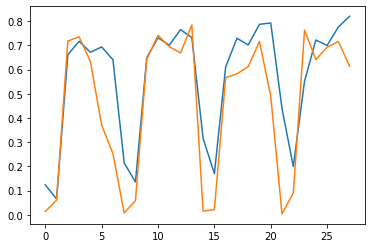

In [60]:
plt.plot(test_preds)
plt.plot(scaled_test)

In [61]:
# dont forget , all data was scaled, we need to un-scale it!
true_preds = scaler.inverse_transform(test_preds)

In [62]:
true_preds

array([[ 64.23140763],
       [ 34.5206309 ],
       [338.20928788],
       [366.57206035],
       [343.32527256],
       [354.69137466],
       [327.69157386],
       [110.35065389],
       [ 70.03959736],
       [331.98093569],
       [373.85684705],
       [358.32893467],
       [391.12804508],
       [374.29364121],
       [161.78422278],
       [ 87.80677518],
       [312.27455473],
       [372.91613913],
       [358.8092593 ],
       [402.25278413],
       [404.94577563],
       [224.84527415],
       [102.58162877],
       [282.70749009],
       [369.20796371],
       [357.72631741],
       [396.63325047],
       [419.24118614]])

In [63]:
test['preds'] = true_preds

In [64]:
test

,record_count,preds
308,8,64.231408
309,32,34.520631
310,367,338.209288
311,376,366.572060
312,324,343.325273
313,190,354.691375
314,130,327.691574
315,5,110.350654
316,31,70.039597
317,329,331.980936


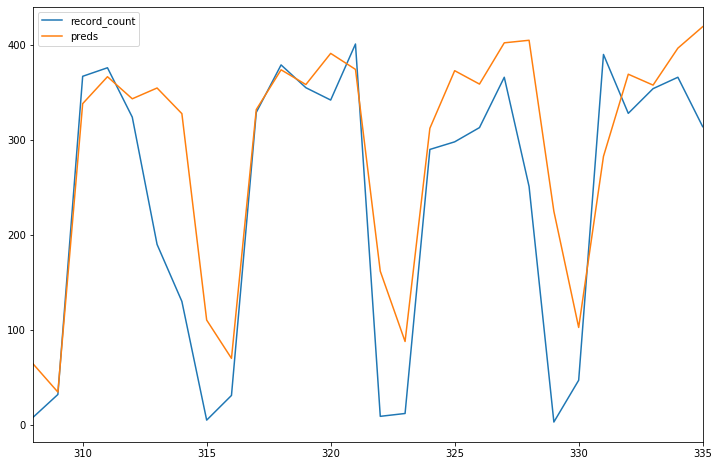

In [66]:
# looks close to me
test.plot(figsize=(12,8))  